In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder



In [12]:
df = pd.read_csv('../dataset/dataset_comandos.csv')

<Axes: xlabel='target'>

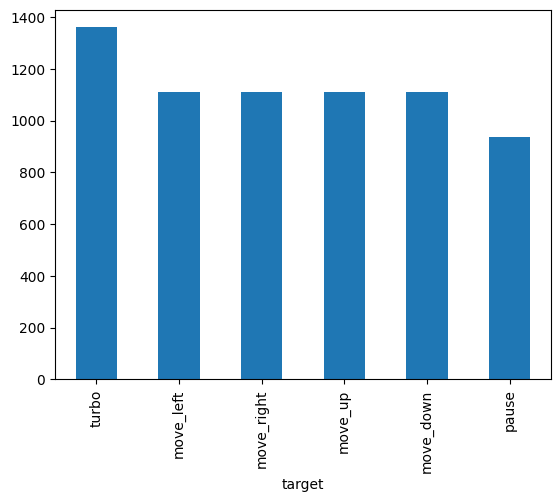

In [13]:
df['target'].value_counts().plot(kind='bar')

In [14]:
# Carregar dataset
X = df['comando']  # Features (comandos)
y = df['target']   # Target (movimentos)

# Vetorização dos comandos (transformar texto em vetores numéricos)
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Codificar o target
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir em treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X_vectorized, y_encoded, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verificar tamanhos das divisões
print(f"Tamanho Treino: {X_train.shape[0]}")
print(f"Tamanho Validação: {X_val.shape[0]}")
print(f"Tamanho Teste: {X_test.shape[0]}")




Tamanho Treino: 4714
Tamanho Validação: 1010
Tamanho Teste: 1011


In [15]:
for  i in range(len(X)):
    print(f'{X[i]} - {y[i]}')

Vá para esquerda  - move_left
Vá para direita  - move_right
Vá para frente  - move_up
Vá para trás  - move_down
Ande para esquerda  - move_left
Ande para direita  - move_right
Ande para frente  - move_up
Ande para trás  - move_down
Dirija para esquerda  - move_left
Dirija para direita  - move_right
Dirija para frente  - move_up
Dirija para trás  - move_down
Mova-se para esquerda  - move_left
Mova-se para direita  - move_right
Mova-se para frente  - move_up
Mova-se para trás  - move_down
Leve-se para esquerda  - move_left
Leve-se para direita  - move_right
Leve-se para frente  - move_up
Leve-se para trás  - move_down
Desloque-se para esquerda  - move_left
Desloque-se para direita  - move_right
Desloque-se para frente  - move_up
Desloque-se para trás  - move_down
Corra para esquerda  - move_left
Corra para direita  - move_right
Corra para frente  - move_up
Corra para trás  - move_down
Avance para esquerda  - move_left
Avance para direita  - move_right
Avance para frente  - move_up
Avance

In [16]:

# Treinar o modelo com Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

In [17]:
# Avaliar no conjunto de validação
y_val_pred = rf_model.predict(X_val)
print("Validation Accuracy: ", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred, target_names=label_encoder.classes_))




Validation Accuracy:  1.0
              precision    recall  f1-score   support

   move_down       1.00      1.00      1.00       175
   move_left       1.00      1.00      1.00       168
  move_right       1.00      1.00      1.00       174
     move_up       1.00      1.00      1.00       188
       pause       1.00      1.00      1.00       129
       turbo       1.00      1.00      1.00       176

    accuracy                           1.00      1010
   macro avg       1.00      1.00      1.00      1010
weighted avg       1.00      1.00      1.00      1010



In [59]:
# move = rf_model.predict(vectorizer.transform(['Pare!']))
# key = label_encoder.inverse_transform(move)

# print(f"Comando: {move[0]} --> Ação prevista: {key[0]}")

Comando: 4 --> Ação prevista: pause


In [18]:
# # Avaliar no conjunto de teste

y_test_pred = rf_model.predict(X_test)
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Test Accuracy:  1.0
              precision    recall  f1-score   support

   move_down       1.00      1.00      1.00       184
   move_left       1.00      1.00      1.00       152
  move_right       1.00      1.00      1.00       184
     move_up       1.00      1.00      1.00       135
       pause       1.00      1.00      1.00       136
       turbo       1.00      1.00      1.00       220

    accuracy                           1.00      1011
   macro avg       1.00      1.00      1.00      1011
weighted avg       1.00      1.00      1.00      1011



In [19]:
import joblib

# Supondo que seu modelo tenha sido treinado e esteja armazenado na variável 'modelo'

# Salvar o modelo em um arquivo
joblib.dump(rf_model, 'modelo.pkl')

# Também é uma boa ideia salvar o vectorizer e o label encoder
joblib.dump(vectorizer, 'vectorizer.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')


['label_encoder.pkl']